In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# -------------------------- Part 1: IRIS Dataset -------------------------- #
# Load the iris dataset (ensure iris.csv is in the same directory or provide correct path)
iris_df = pd.read_csv("iris.csv")

# Separate features and target
X_iris = iris_df.drop("species", axis=1)
y_iris = iris_df["species"]

# Split the data (80% training, 20% testing)
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.2, random_state=42
)

# Choose a value for k; here K=3 is used as an example.
knn_iris = KNeighborsClassifier(n_neighbors=3)

# Train the model on training data
knn_iris.fit(X_train_iris, y_train_iris)

# Predict on test data
y_pred_iris = knn_iris.predict(X_test_iris)

In [ ]:
# Calculate accuracy score
acc_iris = accuracy_score(y_test_iris, y_pred_iris)
print("IRIS Dataset Accuracy Score:", acc_iris)

IRIS Dataset Accuracy Score: 1.0


In [ ]:
# Compute confusion matrix and classification report
cm_iris = confusion_matrix(y_test_iris, y_pred_iris)
print("\nIRIS Dataset Confusion Matrix:\n", cm_iris)


IRIS Dataset Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
cr_iris = classification_report(y_test_iris, y_pred_iris)
print("\nIRIS Dataset Classification Report:\n", cr_iris)


IRIS Dataset Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



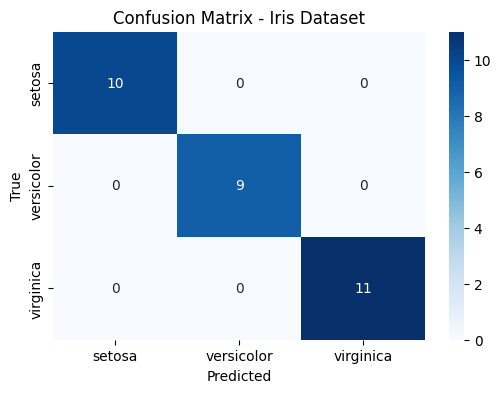

In [ ]:
# Optional: Visualize the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_iris, annot=True, fmt="d", cmap="Blues", xticklabels=iris_df['species'].unique(), yticklabels=iris_df['species'].unique())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Iris Dataset")
plt.show()

In [ ]:
# ----------------------- Part 2: Diabetes Dataset ------------------------- #
# Load the diabetes dataset (ensure diabetes.csv is in the same directory or provide correct path)
diabetes_df = pd.read_csv("diabetes.csv")

# Separate features and target (Outcome column is assumed to be the target)
X_diabetes = diabetes_df.drop("Outcome", axis=1)
y_diabetes = diabetes_df["Outcome"]

In [ ]:
# Perform feature scaling on the features
scaler = StandardScaler()
X_scaled_diabetes = scaler.fit_transform(X_diabetes)

# Split the scaled data (80% training, 20% testing)
X_train_diab, X_test_diab, y_train_diab, y_test_diab = train_test_split(
    X_scaled_diabetes, y_diabetes, test_size=0.2, random_state=42
)

# Choose a value for k; here K=5 is used as an example.
knn_diabetes = KNeighborsClassifier(n_neighbors=5)

# Train the model on training data
knn_diabetes.fit(X_train_diab, y_train_diab)

# Predict on test data
y_pred_diab = knn_diabetes.predict(X_test_diab)

In [ ]:
# Calculate accuracy score
acc_diab = accuracy_score(y_test_diab, y_pred_diab)
print("Diabetes Dataset Accuracy Score:", acc_diab)

Diabetes Dataset Accuracy Score: 0.6883116883116883


In [ ]:
# Compute confusion matrix and classification report
cm_diab = confusion_matrix(y_test_diab, y_pred_diab)
print("\nDiabetes Dataset Confusion Matrix:\n", cm_diab)


Diabetes Dataset Confusion Matrix:
 [[79 20]
 [28 27]]


In [ ]:
cr_diab = classification_report(y_test_diab, y_pred_diab)
print("\nDiabetes Dataset Classification Report:\n", cr_diab)


Diabetes Dataset Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.80      0.77        99
           1       0.57      0.49      0.53        55

    accuracy                           0.69       154
   macro avg       0.66      0.64      0.65       154
weighted avg       0.68      0.69      0.68       154



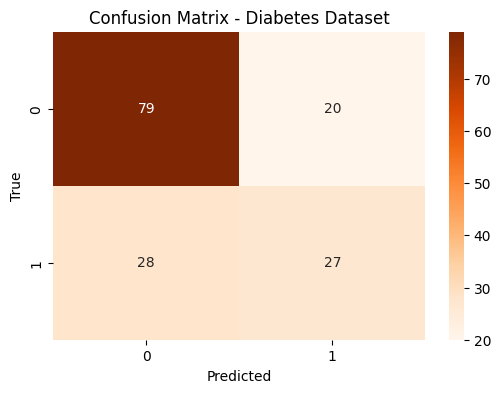

In [ ]:
# Optional: Visualize the confusion matrix for Diabetes dataset
plt.figure(figsize=(6,4))
sns.heatmap(cm_diab, annot=True, fmt="d", cmap="Oranges", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Diabetes Dataset")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# -------------------------- Load the Dataset -------------------------- #
# Load heart.csv (make sure the file is in your working directory)
heart_df = pd.read_csv("heart.csv")

# Display the first few rows to check the data
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# -------------------------- Data Preparation -------------------------- #
# Separate features and target
X_heart = heart_df.drop("target", axis=1)
y_heart = heart_df["target"]

# Perform feature scaling (important for distance-based algorithms like KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_heart)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_heart, test_size=0.2, random_state=42)

In [ ]:
# -------------------------- Finding the Best k -------------------------- #
# We will try a range of k values (neighbors) and select the one with maximum accuracy.
k_range = range(1, 21)
accuracy_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)
    print(f"k = {k} --> Accuracy: {acc:.4f}")


k = 1 --> Accuracy: 0.8525
k = 2 --> Accuracy: 0.8197
k = 3 --> Accuracy: 0.8689
k = 4 --> Accuracy: 0.8852
k = 5 --> Accuracy: 0.9180
k = 6 --> Accuracy: 0.9344
k = 7 --> Accuracy: 0.9180
k = 8 --> Accuracy: 0.8525
k = 9 --> Accuracy: 0.8852
k = 10 --> Accuracy: 0.8852
k = 11 --> Accuracy: 0.8852
k = 12 --> Accuracy: 0.8689
k = 13 --> Accuracy: 0.8852
k = 14 --> Accuracy: 0.8689
k = 15 --> Accuracy: 0.9016
k = 16 --> Accuracy: 0.8852
k = 17 --> Accuracy: 0.8852
k = 18 --> Accuracy: 0.9016
k = 19 --> Accuracy: 0.8852
k = 20 --> Accuracy: 0.8852


In [ ]:
# Determine the best k value
best_k = k_range[np.argmax(accuracy_scores)]
print("\nBest k value:", best_k)


Best k value: 6


In [ ]:
# -------------------------- Train Final Model with Best k -------------------------- #
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred_best = best_knn.predict(X_test)

In [ ]:
# Compute final accuracy, confusion matrix and classification report
final_accuracy = accuracy_score(y_test, y_pred_best)
cm = confusion_matrix(y_test, y_pred_best)
cr_text = classification_report(y_test, y_pred_best)
print("\nFinal Accuracy Score:", final_accuracy)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", cr_text)


Final Accuracy Score: 0.9344262295081968

Confusion Matrix:
 [[28  1]
 [ 3 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.97      0.91      0.94        32

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



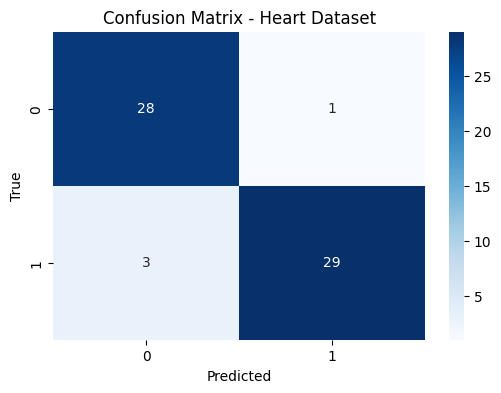

In [ ]:
# -------------------------- Plot Confusion Matrix -------------------------- #
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Heart Dataset")
plt.show()

In [ ]:
# -------------------------- Plot Classification Report -------------------------- #
# Convert the classification report to a DataFrame for plotting
def classification_report_to_dataframe(report):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-3]:
        if line.strip() == '':
            continue
        row_data = line.split()
        # Some rows may have an extra row for 'weighted avg' or 'macro avg'
        if len(row_data) < 4:
            continue
        label = row_data[0]
        precision, recall, f1_score, support = map(float, row_data[1:5])
        report_data.append({
            "class": label,
            "precision": precision,
            "recall": recall,
            "f1_score": f1_score,
            "support": support
        })
    return pd.DataFrame.from_dict(report_data)

cr_df = classification_report_to_dataframe(cr_text)

<Figure size 800x400 with 0 Axes>

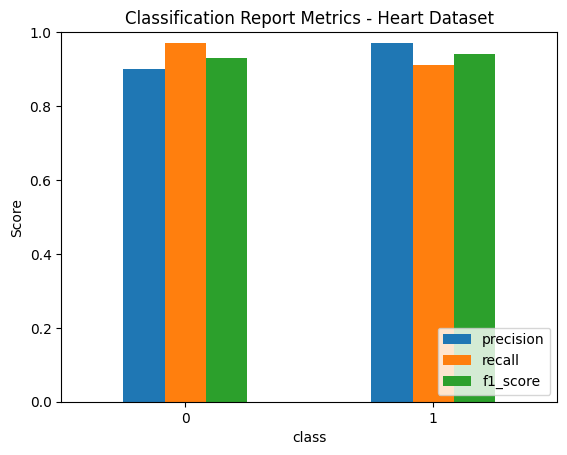

In [ ]:
# Plot the classification report metrics
plt.figure(figsize=(8, 4))
cr_df.set_index("class")[["precision", "recall", "f1_score"]].plot(kind="bar")
plt.title("Classification Report Metrics - Heart Dataset")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()